<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/Semana_7_Notebook1_A01793546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

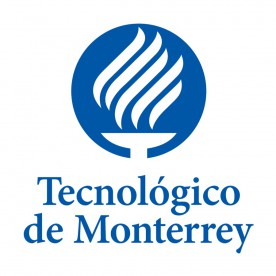


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Dr. María de la Paz Rico Fernández


## **Adtividad de la Semana 7 Notebook 1**
###**Actividad Semanal -- 7 Regresiones #1 & #2**


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer, mean_absolute_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [2]:
path = 'https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv'
df = pd.read_csv(path)
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

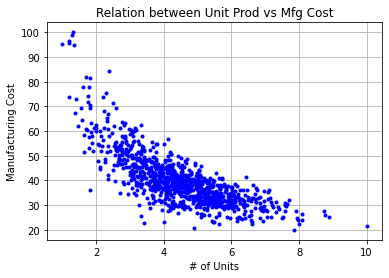

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('# of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)

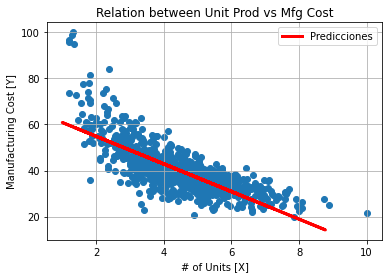

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[]
lista_para_r2 =[]
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test 
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=3, label="Predicciones")
plt.xlabel('# of Units [X]')
plt.ylabel('Manufacturing Cost [Y]')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)

In [6]:
#identificando la ecuacion
linear_reg.coef_, linear_reg.intercept_

#$\hat{y} = {slope}}X + {intercept}
#La descripcion de la ecuaci[on]
print('Nuestro modelo es: Y =', linear_reg.coef_,'X + ', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple)
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

# calculando los posibles errores
print()
print('Su MAE {Error Medio Absoluto}: ', round(metrics.mean_absolute_error(y_test,y_para_regresion),2))
print()
print('Su RMSE {Error Medio Cuadrado}: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion)),2))

#calculando la r cuadrada
print()
print('R2_score: ', round(r2_score(y_test,y_para_regresion)),2)

Nuestro modelo es: Y = [-5.98882699] X +  66.83650741226988

Su MAE {Error Medio Absoluto}:  5.01

Su RMSE {Error Medio Cuadrado}:  7.11

R2_score:  1 2


In [7]:
Caract_Poly = PolynomialFeatures(degree=2, include_bias=False) #Aqui tenemos que crear las caracteristicas, revisar porque el grado es 2, porque queremos ajustar a un polinomio de segundo raro
#Lo de arriba lo que hace es que los datos originales los va a ir elevando al cuadrado, porque le pusimos 2, pero si juera mas, pues nos va haciendo la potencia
X_polinomial = Caract_Poly.fit_transform(X_train)
print("Input",Caract_Poly.n_input_features_)
print("Ouput",Caract_Poly.n_output_features_)
print("Powersn",Caract_Poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) #Creamos una 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_

Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [8]:
X_polinomial_test = Caract_Poly.fit_transform(X_test)
X_polinomial_test.shape

(100, 2)

In [9]:
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape

(100,)

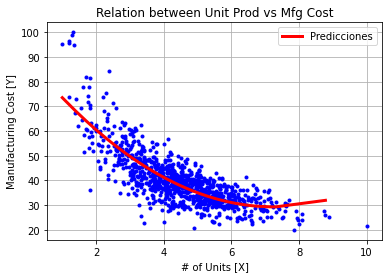

In [10]:
# graficando las predicciones
order = np.argsort(X_test.values.ravel())  

sortedXPoly = X_test.values.ravel()[order]  
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poli[order]

plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=3, label="Predicciones")
plt.xlabel('# of Units [X]')
plt.ylabel('Manufacturing Cost [Y]')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)

In [11]:
#Estableciendo nuevo modelo

print('El nuevo modelo : Y = ', round(regresion_lineal_poli.coef_[1],2),'X^2 +', round(regresion_lineal_poli.coef_[0],2),'X +',round(regresion_lineal_poli.intercept_,2))
print()
mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metric_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)
#mae_list.append(mae) esto no, eso es del compa;ero que nos los paso, no sean copiones
r2Score = r2_score(y_test, y_con_regresion_poli)
#r2_list.append(r2Score) esto tampoco, es del metodo avanzado del compa;ero
print('Su MAE {Error Medio Absoluto}: ', round(metric_mae,2))
print()
print('Su RMSE {Error Medio Cuadrado}: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)),2))
print()
print('R2_score: ',round(r2Score, 2))

El nuevo modelo : Y =  1.13 X^2 + -16.41 X + 88.8

Su MAE {Error Medio Absoluto}:  4.38

Su RMSE {Error Medio Cuadrado}:  5.83

R2_score:  0.74


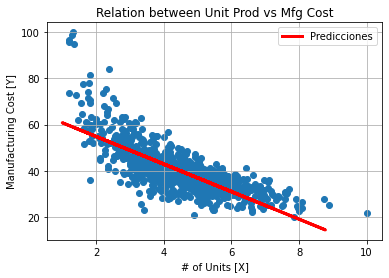

In [12]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=3, label="Predicciones")
plt.xlabel('# of Units [X]')
plt.ylabel('Manufacturing Cost [Y]')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)

**Podemos observar como Ridge realiza una compensación mucho mas fuerte generando una predicción mas limitadas**

In [13]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print()
print('r2_score',r2Score)
print()
#La ecuacion

print('El modelo es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)


Error medio Absoluto (MAE): 5.0162057389928325

Root Mean Squared Error: 7.1111119498200965

r2_score 0.6113903530239646

El modelo es: Y = [-5.97003397] X + 66.75243237759665


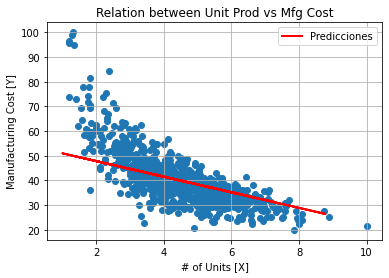

In [14]:
#Ahora vamos con el lasso
#class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')[source]

mi_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_lasso = mi_lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel('# of Units [X]')
plt.ylabel('Manufacturing Cost [Y]')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)

#El lasso castiga mas a las coeficientes de las variables, en comparacion con el ridge

**Podemos ver como lasso realiza una compensación mucho mas fuerte generando una predicción mas limitada a comparación a la Ridge**

In [15]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Error medio Absoluto (MAE):', round(metrica_mae_lasso,2))
print()
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)),2))
print()
print('r2_score',round(r2Score,2))
print()
#La ecuacion

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)

Error medio Absoluto (MAE): 5.68

Root Mean Squared Error: 8.41

r2_score 0.46

El modelo es: Y = [-3.15572458] X + 54.16195119377413


In [16]:
print(lista_para_mae)
print(lista_para_r2)

[5.013587781954963, 4.3833025759681075, 5.0162057389928325, 5.681207654677401]
[0.6116251549562579, 0.7385501224942537, 0.6113903530239646, 0.456505036516648]


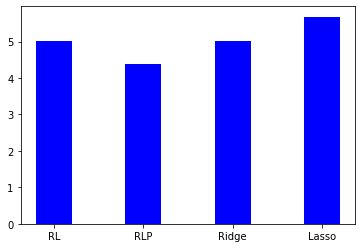

In [17]:
#Grafico de mae
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae,color ='blue', width = 0.4)
plt.show()

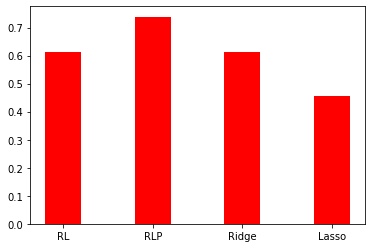

In [18]:
#Grafico de r cuadrada
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_r2,color ='red', width = 0.4)
plt.show()

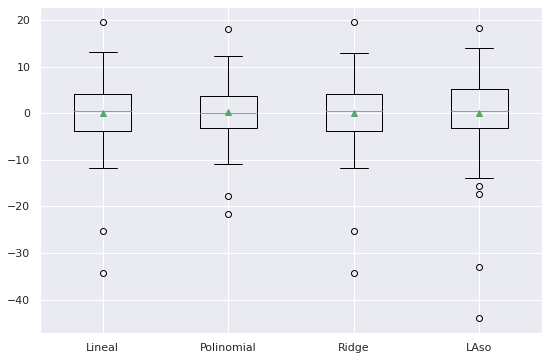

In [19]:
residuo_regresion_simple=y_para_regresion - y_test
residuo_regresion_poliforme= y_con_regresion_poli - y_test
residuo_ridge=y_para_ridge - y_test
residuo_lasso=y_para_lasso - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('LAso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10599,7312400075,20141216T000000,422500.0,2,1.00,910,4800,1.0,0,0,...,7,910,0,1923,0,98126,47.5536,-122.377,1450,5000
8410,3625059140,20140507T000000,515000.0,3,1.75,1580,9147,1.0,0,1,...,7,1210,370,1967,0,98008,47.6069,-122.112,2600,23564
12205,8605900060,20140603T000000,545000.0,3,1.75,1810,3000,1.5,0,0,...,7,1810,0,1903,0,98107,47.6599,-122.363,1140,3000
3099,5360200054,20141002T000000,247500.0,3,2.00,1530,8749,1.0,0,0,...,7,1530,0,1995,0,98023,47.2974,-122.372,1750,8749
3765,5113400535,20140507T000000,750000.0,3,2.75,2520,5401,1.0,0,0,...,7,1360,1160,1946,0,98119,47.6452,-122.373,1800,5036
4720,8074200100,20141015T000000,266000.0,3,1.50,1120,8250,1.0,0,0,...,7,1120,0,1957,0,98056,47.4905,-122.179,1320,8400
10383,9144300060,20150430T000000,350000.0,3,1.00,1250,9786,1.0,0,0,...,7,1250,0,1969,0,98072,47.7622,-122.163,1660,9621
1983,434000030,20141219T000000,555000.0,3,2.00,2080,7020,1.0,0,0,...,7,1040,1040,1951,0,98115,47.6768,-122.285,1920,7000
13256,1954700410,20140801T000000,2546000.0,4,3.00,4190,8805,2.5,0,2,...,9,3490,700,1928,0,98112,47.6181,-122.284,3780,8558
11915,1773100310,20150423T000000,464950.0,4,2.50,1640,6000,2.0,0,0,...,7,1640,0,2011,0,98106,47.5590,-122.365,1640,4800


In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


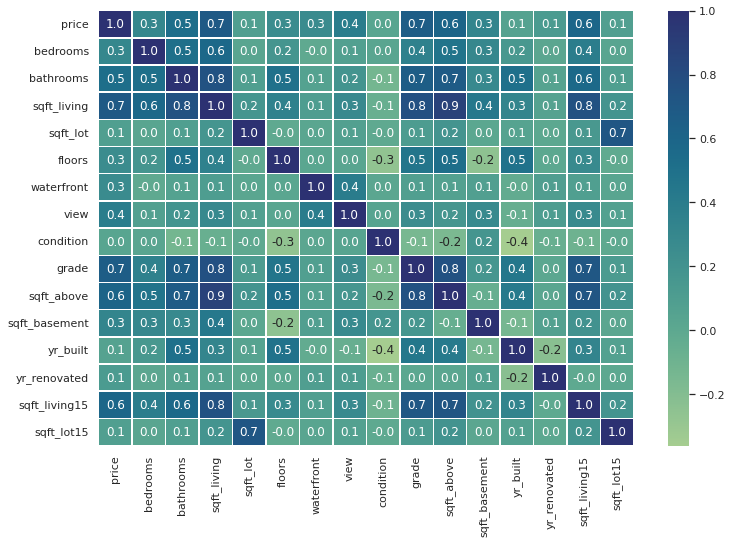

In [24]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='crest', linewidths = .5, fmt=".1f")
plt.show()

In [25]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en el Dataset: {len(X)}')
print("*******"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*******"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en el Dataset: 21613
**********************************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**********************************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Input 15
Ouput 135
Powersn [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

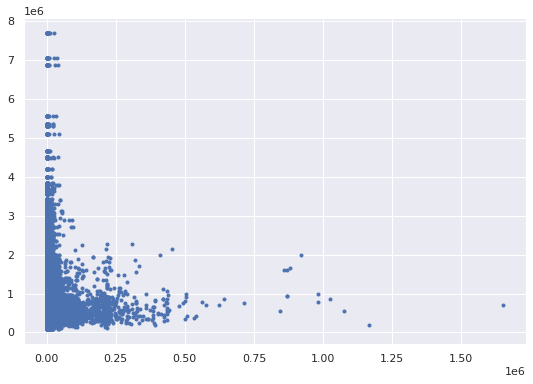

In [26]:
Caract_Poly = PolynomialFeatures(degree=2, include_bias=False) 
X_polinomial = Caract_Poly.fit_transform(X_train)
print("Input",Caract_Poly.n_input_features_)
print("Ouput",Caract_Poly.n_output_features_)
print("Powersn",Caract_Poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) #Creamos una 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_
X_polinomial_test = Caract_Poly.fit_transform(X_test)
X_polinomial_test.shape
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape
order = np.argsort(X_test.values.ravel())  

sortedXPoly = X_test.values.ravel()  
sortedYPoly = y_test.values.ravel()
sorted_predicPoly = y_con_regresion_poli

plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=3, label="Predicciones")
plt.xlabel('# of Units [X]')
plt.ylabel('Manufacturing Cost [Y]')
plt.title('Relation between Unit Prod vs Mfg Cost')
plt.grid(True)
plt.legend(loc="upper right", fontsize=10)